# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

In [1]:
#The user should expect to get 15 (100*15%)

In [2]:
#Get elixirs or don't = Bernoulli
#Try 100 loot boxes = Binomial

In [3]:
import numpy as np

#Define the function for elixir
def loot(n, p_elixir):                            # define a function n and probability 
    count = 0                                     # where we'll store our count (# of elixir)
    for i in range(n):                            # buying loot boxes for n times
        result = np.random.choice(['elixir', 'nothing'], p = [p_elixir, 1 - p_elixir]) 
        
        if result == 'elixir':
            count += 1                      # then add 1 to our count
    
    return count                        # return the number of counts

In [4]:
loot(100, 0.15)

19

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

In [5]:
#Not possible to definitely get. But can do an estimate on most likely to get. 

In [6]:
#but we can plot the chances someone will get an elixir, based on the number of boxes they have
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd

%matplotlib inline
p_elixir= 0.15
boxes = 100 #For example, if they have 100 boxes
elixir_dist =stats.binom(boxes,p_elixir)
elixir_prob = list(range(1, boxes+1))

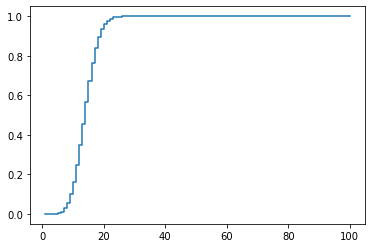

In [7]:
plt.step(elixir_prob,elixir_dist.cdf(elixir_prob))
#Reading the chart, for probability to be close to 1, you need to buy 30 loot boxes
#x axis = number of loot boxes bought

C:\Users\ANNITAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


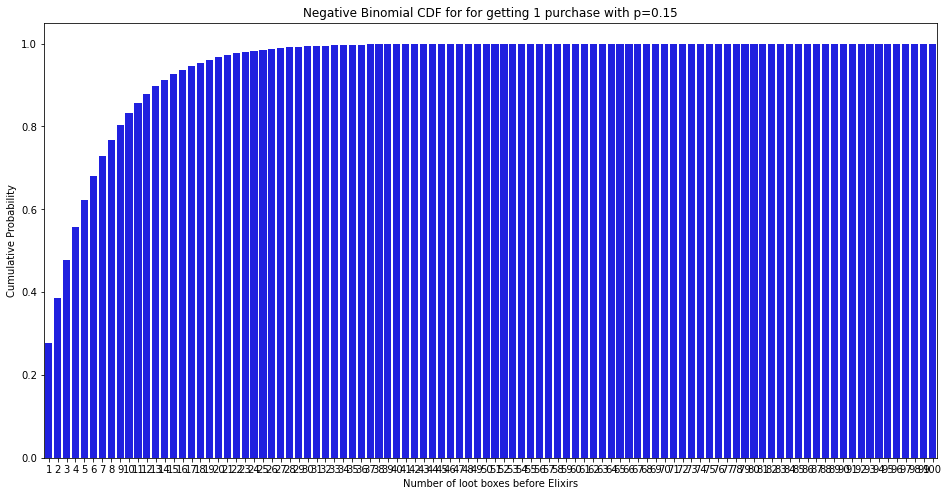

In [77]:
#Negative Binomial - represents the number of failures before you get a success in a series of Bernoulli trials.
#To remove before submission

p_elixir= 0.15
boxes = 1
elixir_dist = stats.nbinom(counts,p_elixir)

x = tuple(range(1,101))
cum_prob = elixir_dist.cdf(x)
cdf = pd.DataFrame({'Number of loot boxes before Elixirs':x, 'Cumulative Probability':cum_prob})
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot('Number of loot boxes before Elixirs', 'Cumulative Probability', data=cdf, color='blue', ax=ax)
ax.set_xticks([i for i in range(100)]) # choose which x locations to have ticks
ax.set_xticklabels([i for i in range(1,101)]) # set the labels to display at those ticksplt.title('Negative Binomial PMF for for getting {} Elixir with p={}'.format(counts,p_elixir));
plt.title('Negative Binomial CDF for for getting {} purchase with p={}'.format(boxes,p_elixir));

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

1. Because there's only 2 outcomes - whether you have or dont have the elixirs (it's a binary outcome).
2. Outcomes are indendent on each other 

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

Binomial.
1. Probability for elixir (success rate) = 0.15
2. Number of boxes to purchase is fixed; ie 100
3. Outcomes are independent of each other.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

<BarContainer object of 100 artists>

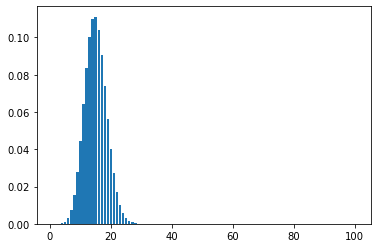

In [85]:
# Show your work; leave your answer in a comment.
#To remove before submission
#Binomial Distribution
p_elixir= 0.15
boxes = 100

elixir_distn = stats.binom(boxes, p_elixir)
possible_elixir = list(range(1, 101))

plt.bar(possible_elixir,
        elixir_distn.pmf(possible_elixir))

In [30]:
boxes=100
counts_lessthan20 =0
elixir_distn=stats.binom(boxes,p_elixir)
for box in range(21):
    counts_lessthan20 +=elixir_distn.pmf(box)
counts_morethan20=1-counts_lessthan20
counts_morethan20

0.06631976581888699

In [81]:
#To remove before submission

p_elixir = .15
n_boxes = 100
elixir_stats = stats.binom(n_boxes, p_elixir)

chance_of_get_20_more = 1 - sum(elixir_stats.pmf(i) for i in range(0, 21))
print(f'If a user earns 100 loot boxes, the chance tht a user gets 20 elixirs is {chance_of_get_20_more*100}%')

If a user earns 100 loot boxes, the chance tht a user gets 20 elixirs is 6.631976581888699%


#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [31]:
boxes=100
elixir_distn=stats.binom(boxes,p_elixir)
possible_elixir=list(range(0,101))
counts_morethan20=1-elixir_distn.cdf(20)
counts_morethan20

0.06631976581888166

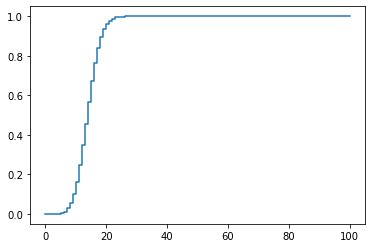

In [32]:
# Show your work; leave your answer in a comment.
boxes = 100

elixir_distn = stats.binom(boxes, p_elixir)
possible_elixir = list(range(0, 101))
plt.step(possible_elixir,
        elixir_distn.cdf(possible_elixir))


#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

In [33]:
#About 6%

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

Poisson - looks at outcome over a period of time (no fixed players/boxes etc)
1. Average success rate is provided

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

<BarContainer object of 10 artists>

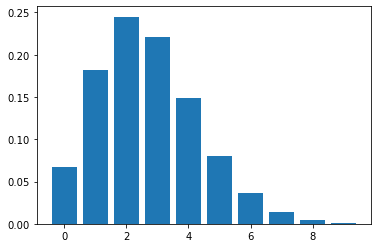

In [86]:
#To remove before submission
#average/rate
n_loot = 2.7

loot_distn = stats.poisson(n_loot)

loot_outcomes = list(range(0,10)) #only shows the pmf of an individual getting between 0 to 10 boxes a day
plt.bar(loot_outcomes,
        loot_distn.pmf(loot_outcomes))

#but, the question is - how many user it takes for their pmf outcomes to add up to $500, 000

In [87]:
#To remove before submission
#to show the distribution and the probability for each bar
loot_distn.pmf(loot_outcomes)

array([0.06720551, 0.18145488, 0.24496409, 0.22046768, 0.14881569,
       0.08036047, 0.03616221, 0.01394828, 0.00470755, 0.00141226])

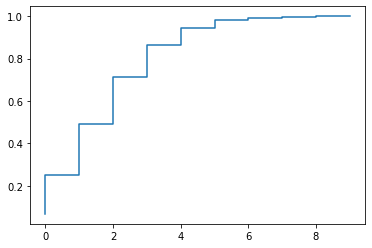

In [88]:
#To remove before submission
plt.step(loot_outcomes, loot_distn.cdf(loot_outcomes))

#Visualizing the distribution
  #possible_loots_per_user=[1,2,3,4,5,6,7,8,9,10]
#probabiliity is obtained by the distribution
  #p_possible_loots_per_user=[0.06720551, 0.18145488, 0.24496409, 0.22046768, 0.14881569,
  #     0.08036047, 0.03616221, 0.01394828, 0.00470755, 0.00141226]
  #plt.step(possible_loots_per_user, np.cumsum(p_possible_loots_per_user))

In [96]:
target_rev = 500000
price_of_box = 1
boxes_per_user = 2.7

#Calculate rev per user
rev_per_user = price_of_box*boxes_per_user

users_needed = target_rev/boxes_per_user
users_needed

185185.18518518517

In [101]:
# round up to nearest thousand
import math
users_needed_roundedup = math.ceil(users_needed/1000)*1000
print(f'At least {round(users_needed_roundedup)} users would need to be on your platform for revenue to be at least $500000')

At least 186000 users would need to be on your platform for revenue to be at least $500000


#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [66]:
# Show your work; leave your answer in a comment.
list_of_outcomes=np.random.poisson(2.7, 184532)
list_of_outcomes
#give you an array of possible outcomes for 184532 users

array([0, 3, 2, ..., 1, 3, 4])

In [67]:
five_or_more_outcomes=[item for item in list_of_outcomes if item>=5]
five_or_more_outcomes_total=sum(five_or_more_outcomes)
five_or_less_outcomes_total= 500000-five_or_more_outcomes_total
print(f'Money earned from high value users ${five_or_more_outcomes_total}')
print(f'Money earned from low value users ${five_or_less_outcomes_total}')

Money earned from high value users $142385
Money earned from low value users $357615


#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

1. The average number of loot boxes purchased per user
2. The minimum and maximum loot boxes per user (since each box costs 1$ this is also the min/max revenue)
3. The median number of loot boxes purchased per user
4 .The proportion/distribution of high/low value users

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [124]:
#to remove before submitting
#want to build the same 1D array
one_elixir = np.random.choice(['y', 'n'], 100000, p=(0.15, 0.85))
one_elixir

array(['n', 'n', 'n', ..., 'n', 'n', 'n'], dtype='<U1')

In [220]:
def processes(n):
    trials = []
    for box in range(n):
        n_trial = 0
        n_boxes_open = 0
        while n_boxes_open <= 85:  #cause the range for int is 100; 85 means less than 0.85; my prob is 0.15
            n_boxes_open = np.random.randint(1,101) #assigning random numbers to number of boxes opened; this is used as an estimation for prob. selecting 100 numbers, if <= 85, then no elixir. thats why keep adding. 
            n_trial += 1
        trials.append(n_trial)
    return trials

In [221]:
# Try 100,000 trials using the experiment function
trials = processes(100000)
first_elixir = np.array(trials)
first_elixir

array([ 2,  5,  2, ...,  5,  7, 22])

In [222]:
print(first_elixir.shape)

(100000,)


In [224]:
#Average number of loot boxes before getting first elixir
Average_loots = first_elixir.sum()/100000
Average_loots

6.65763

In [225]:
# Construct the the keys and values to store the percentile data
pctl_keys = [5, 25, 50, 75, 95]
pctl_values = [np.percentile(first_elixir, key) for key in pctl_keys]
pctl = dict(zip(pctl_keys, pctl_values))
print(pctl)

{5: 1.0, 25: 2.0, 50: 5.0, 75: 9.0, 95: 19.0}


In [226]:
for key, value in pctl.items():
    print(f'{key}th percentile: open {value} boxes before getting 1st elixir')

5th percentile: open 1.0 boxes before getting 1st elixir
25th percentile: open 2.0 boxes before getting 1st elixir
50th percentile: open 5.0 boxes before getting 1st elixir
75th percentile: open 9.0 boxes before getting 1st elixir
95th percentile: open 19.0 boxes before getting 1st elixir


### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

Dictionary. It allows the storing of key (the type of elixir) and the amount/percentage.

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

1. Total amount of revenue
2. Total number of unique  users
3. Total number of high value users
4. Proportion of high/low value users